In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
DATASET_PATH = 'data/benign_or_attack'

In [8]:
all_files = [os.path.join(DATASET_PATH, f) for f in os.listdir(DATASET_PATH) if f.endswith('.csv')]

In [9]:
data = pd.concat([pd.read_csv(f, delimiter=',') for f in all_files], ignore_index=True)
print(f'Number of Rows: {data.shape[0]}')
print(f'Number of Columns: {data.shape[1]}')

Number of Rows: 1566314
Number of Columns: 79


In [10]:
for i, d in enumerate(data.columns):
    print(f"{i + 1} {d}")

1  Destination Port
2  Flow Duration
3  Total Fwd Packets
4  Total Backward Packets
5 Total Length of Fwd Packets
6  Total Length of Bwd Packets
7  Fwd Packet Length Max
8  Fwd Packet Length Min
9  Fwd Packet Length Mean
10  Fwd Packet Length Std
11 Bwd Packet Length Max
12  Bwd Packet Length Min
13  Bwd Packet Length Mean
14  Bwd Packet Length Std
15 Flow Bytes/s
16  Flow Packets/s
17  Flow IAT Mean
18  Flow IAT Std
19  Flow IAT Max
20  Flow IAT Min
21 Fwd IAT Total
22  Fwd IAT Mean
23  Fwd IAT Std
24  Fwd IAT Max
25  Fwd IAT Min
26 Bwd IAT Total
27  Bwd IAT Mean
28  Bwd IAT Std
29  Bwd IAT Max
30  Bwd IAT Min
31 Fwd PSH Flags
32  Bwd PSH Flags
33  Fwd URG Flags
34  Bwd URG Flags
35  Fwd Header Length
36  Bwd Header Length
37 Fwd Packets/s
38  Bwd Packets/s
39  Min Packet Length
40  Max Packet Length
41  Packet Length Mean
42  Packet Length Std
43  Packet Length Variance
44 FIN Flag Count
45  SYN Flag Count
46  RST Flag Count
47  PSH Flag Count
48  ACK Flag Count
49  URG Flag Count
50

In [19]:
print("\nDistribution of Label:")
label_distribution = data[' Label'].value_counts()
print(label_distribution)


Distribution of Label:
1022539
 Label
BENIGN                        1022539
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


C:\Users\owtf0\AppData\Local\Temp\ipykernel_70668\145626988.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(label_distribution[0])


In [5]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [12]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


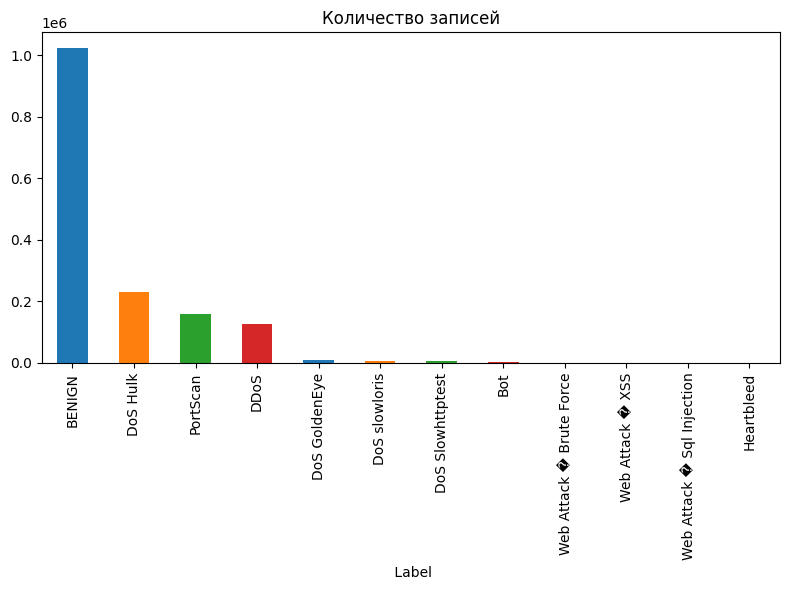

In [18]:
plt.figure(figsize=(8, 6))
label_distribution.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Количество записей')
plt.tight_layout()
plt.show()

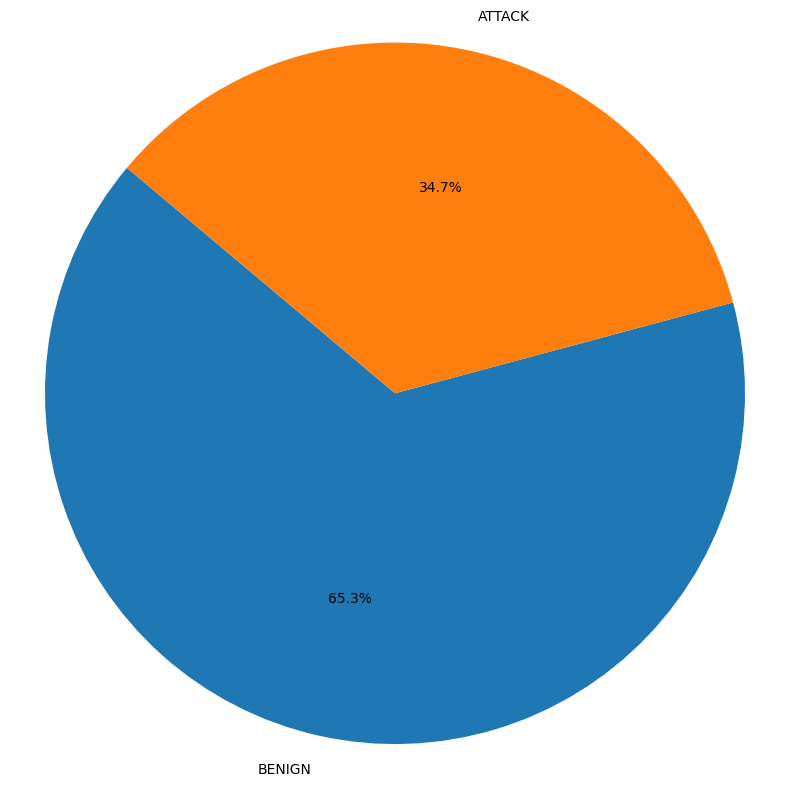

In [23]:
# Группировка данных: BENIGN и ATTACK
data['Category'] = data[' Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')
plot_data = data['Category'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show()